# MGE303 DataMining : Term Project

# House Price of King County Regions (Regression)

Name : 김소랑(E-mail : solangii@unist.ac.kr)

----

## Introduction
Hello, I am solang Kim. I will exploring **the House Price of Kimg County Regions** by term project of MGE303 DataMining class. Actually, This is a problem of **regression**. We **want to know the house price in the King County area**. So, **Our goal is to more accurately predict house price for a house that meets the conditions i want by using the given data**(Problem Definition).

첫번째로는 주어진 데이터들을 이용해서 집 값을 결정하는데 가장 많이 영향을 미치는 요인들이 무엇인지 식별하고, 그 요인들 간의 상관관계를 파악하기 위해 EDA를 진행할 것이다. 그 후, Data Pre-Processing을 진행하여 데이터를 정규화(?) 시켜 feature engineering을 진행한다. 그 다음, 머신러닝을 적용하여 집 값을 예측하는 모델을 구축할 것이고. 그 후에 k-CV test를 이용해서 각각의 정확도를 측정할 것이다.


저는 Regression을 택했고 ㅁㄴㅇㄹ 모델을 썼고 정확도는 ㅁㄴㅇㄹ 
문제 정의가 ㅁㄴㅇㄹ 가설은 ㅁㄴㅇㄹ
사용한 모델은 ㅁㄴㅇㄹㅁㄴㅇㄹ
어쩌구등



- Preparation
- Data Munging
- 


  - - -

## Preparation

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

- - -

## Data Munging

### Data Load

In [373]:
df = pd.read_csv("./MGE303_Term Project_Regression_Data (House Price).csv")

In [374]:
df.shape

(21613, 22)

In [375]:
df.head()

,PRICE,NUM_BD,BTH_STAT,AR_LIV,AR_PL,NUM_FLR,NEAR_RIV,OUTLOOK,CONDITION,AR_RFTP,...,IS_RENOVATED,LAT,LONG,AVG_AR_LIV_NEAR,AVG_AR_PL_NEAR,SUMMER_HIGH,WINTER_LOW,PRECIPITATION,VIOLENT_CRIME,PROPERTY_CRIME
0,221900,3,<2,1180,5650,1.0,0,0,3,1180,...,0,47.5112,-122.257,1340,5650,76,37,45.0,41.4,97.6
1,329950,3,<2,2080,5969,1.0,0,2,3,1080,...,0,47.5474,-122.295,2090,5500,76,37,45.0,41.4,97.6
2,205425,2,<2,880,6780,1.0,0,0,4,880,...,0,47.5009,-122.248,1190,6780,76,37,45.0,41.4,97.6
3,171800,4,2=<ROOMS<=4,1570,9600,1.0,0,0,3,1570,...,0,47.4965,-122.303,1880,9000,76,37,45.0,41.4,97.6
4,445000,3,2=<ROOMS<=4,2100,8201,1.0,0,2,3,1620,...,0,47.5091,-122.244,2660,8712,76,37,45.0,41.4,97.6


There are **21613 samples** and **22 features**.

### Data Handle

#### Information of Data

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRICE            21613 non-null  int64  
 1   NUM_BD           21613 non-null  int64  
 2   BTH_STAT         21613 non-null  object 
 3   AR_LIV           21613 non-null  int64  
 4   AR_PL            21613 non-null  int64  
 5   NUM_FLR          21613 non-null  float64
 6   NEAR_RIV         21613 non-null  int64  
 7   OUTLOOK          21613 non-null  int64  
 8   CONDITION        21613 non-null  int64  
 9   AR_RFTP          21613 non-null  int64  
 10  AR_BASE          21613 non-null  int64  
 11  YR_PAST          21613 non-null  int64  
 12  IS_RENOVATED     21613 non-null  int64  
 13  LAT              21613 non-null  float64
 14  LONG             21613 non-null  float64
 15  AVG_AR_LIV_NEAR  21613 non-null  int64  
 16  AVG_AR_PL_NEAR   21613 non-null  int64  
 17  SUMMER_HIGH 

We can see the characteristics and data types in the column through `df.info()`. Only column `BTH_STAT`, which corresponds to index 2, has an object value. It can be seen that encoding is necessary to accurately analyze this.

#### Finding Missing Value

In [377]:
df.isnull().sum()

PRICE              0
NUM_BD             0
BTH_STAT           0
AR_LIV             0
AR_PL              0
NUM_FLR            0
NEAR_RIV           0
OUTLOOK            0
CONDITION          0
AR_RFTP            0
AR_BASE            0
YR_PAST            0
IS_RENOVATED       0
LAT                0
LONG               0
AVG_AR_LIV_NEAR    0
AVG_AR_PL_NEAR     0
SUMMER_HIGH        0
WINTER_LOW         0
PRECIPITATION      0
VIOLENT_CRIME      0
PROPERTY_CRIME     0
dtype: int64

We can see that there are no missing value.

#### Encoding

Let encoding the column `BTH_STAT`.


The type of `BTH_STAT` is categorical and `BTH_STAT` means number of bathrooms. Also, It has 4 category that `<2`, `2=<ROOMS<=4`, `4<ROOMS<=6`, and `>6`. I converted the values corresponding to each category into 1,2,3,4 using map.

In [378]:
bth_mapping ={
    '<2':1,
    '2=<ROOMS<=4':2,
    '4<ROOMS<=6':3,
    '>6':4
}

In [379]:
func = lambda x: bth_mapping.get(x, x)

In [380]:
df['BTH_STAT_2'] = df.BTH_STAT.map(func)
df

,PRICE,NUM_BD,BTH_STAT,AR_LIV,AR_PL,NUM_FLR,NEAR_RIV,OUTLOOK,CONDITION,AR_RFTP,...,LAT,LONG,AVG_AR_LIV_NEAR,AVG_AR_PL_NEAR,SUMMER_HIGH,WINTER_LOW,PRECIPITATION,VIOLENT_CRIME,PROPERTY_CRIME,BTH_STAT_2
0,221900,3,<2,1180,5650,1.0,0,0,3,1180,...,47.5112,-122.257,1340,5650,76,37,45.0,41.4,97.6,1
1,329950,3,<2,2080,5969,1.0,0,2,3,1080,...,47.5474,-122.295,2090,5500,76,37,45.0,41.4,97.6,1
2,205425,2,<2,880,6780,1.0,0,0,4,880,...,47.5009,-122.248,1190,6780,76,37,45.0,41.4,97.6,1
3,171800,4,2=<ROOMS<=4,1570,9600,1.0,0,0,3,1570,...,47.4965,-122.303,1880,9000,76,37,45.0,41.4,97.6,2
4,445000,3,2=<ROOMS<=4,2100,8201,1.0,0,2,3,1620,...,47.5091,-122.244,2660,8712,76,37,45.0,41.4,97.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2720000,4,2=<ROOMS<=4,3990,18115,2.0,0,0,4,3990,...,47.6177,-122.229,3450,16087,76,37,42.0,6.1,33.3,2
21609,1950000,4,2=<ROOMS<=4,4065,18713,2.0,0,0,4,4065,...,47.6209,-122.237,3070,18713,76,37,42.0,6.1,33.3,2
21610,2250000,5,4<ROOMS<=6,3410,8118,2.0,0,0,3,3410,...,47.6295,-122.236,3410,16236,76,37,42.0,6.1,33.3,3
21611,2900000,5,2=<ROOMS<=4,5190,14600,2.0,0,1,3,5190,...,47.6102,-122.225,3840,19250,76,37,42.0,6.1,33.3,2


In [381]:
df.drop(['BTH_STAT'],axis=1, inplace=True)
df

,PRICE,NUM_BD,AR_LIV,AR_PL,NUM_FLR,NEAR_RIV,OUTLOOK,CONDITION,AR_RFTP,AR_BASE,...,LAT,LONG,AVG_AR_LIV_NEAR,AVG_AR_PL_NEAR,SUMMER_HIGH,WINTER_LOW,PRECIPITATION,VIOLENT_CRIME,PROPERTY_CRIME,BTH_STAT_2
0,221900,3,1180,5650,1.0,0,0,3,1180,0,...,47.5112,-122.257,1340,5650,76,37,45.0,41.4,97.6,1
1,329950,3,2080,5969,1.0,0,2,3,1080,1000,...,47.5474,-122.295,2090,5500,76,37,45.0,41.4,97.6,1
2,205425,2,880,6780,1.0,0,0,4,880,0,...,47.5009,-122.248,1190,6780,76,37,45.0,41.4,97.6,1
3,171800,4,1570,9600,1.0,0,0,3,1570,0,...,47.4965,-122.303,1880,9000,76,37,45.0,41.4,97.6,2
4,445000,3,2100,8201,1.0,0,2,3,1620,480,...,47.5091,-122.244,2660,8712,76,37,45.0,41.4,97.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2720000,4,3990,18115,2.0,0,0,4,3990,0,...,47.6177,-122.229,3450,16087,76,37,42.0,6.1,33.3,2
21609,1950000,4,4065,18713,2.0,0,0,4,4065,0,...,47.6209,-122.237,3070,18713,76,37,42.0,6.1,33.3,2
21610,2250000,5,3410,8118,2.0,0,0,3,3410,0,...,47.6295,-122.236,3410,16236,76,37,42.0,6.1,33.3,3
21611,2900000,5,5190,14600,2.0,0,1,3,5190,0,...,47.6102,-122.225,3840,19250,76,37,42.0,6.1,33.3,2


In [382]:
'''def dummy_data(data,columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data'''

'def dummy_data(data,columns):\n    for column in columns:\n        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)\n        data = data.drop(column, axis=1)\n    return data'

In [383]:
'''dummy_column = ['BTH_STAT']
df = dummy_data(df, dummy_column)'''

"dummy_column = ['BTH_STAT']\ndf = dummy_data(df, dummy_column)"

In [384]:
df.head()

,PRICE,NUM_BD,AR_LIV,AR_PL,NUM_FLR,NEAR_RIV,OUTLOOK,CONDITION,AR_RFTP,AR_BASE,...,LAT,LONG,AVG_AR_LIV_NEAR,AVG_AR_PL_NEAR,SUMMER_HIGH,WINTER_LOW,PRECIPITATION,VIOLENT_CRIME,PROPERTY_CRIME,BTH_STAT_2
0,221900,3,1180,5650,1.0,0,0,3,1180,0,...,47.5112,-122.257,1340,5650,76,37,45.0,41.4,97.6,1
1,329950,3,2080,5969,1.0,0,2,3,1080,1000,...,47.5474,-122.295,2090,5500,76,37,45.0,41.4,97.6,1
2,205425,2,880,6780,1.0,0,0,4,880,0,...,47.5009,-122.248,1190,6780,76,37,45.0,41.4,97.6,1
3,171800,4,1570,9600,1.0,0,0,3,1570,0,...,47.4965,-122.303,1880,9000,76,37,45.0,41.4,97.6,2
4,445000,3,2100,8201,1.0,0,2,3,1620,480,...,47.5091,-122.244,2660,8712,76,37,45.0,41.4,97.6,2


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRICE            21613 non-null  int64  
 1   NUM_BD           21613 non-null  int64  
 2   AR_LIV           21613 non-null  int64  
 3   AR_PL            21613 non-null  int64  
 4   NUM_FLR          21613 non-null  float64
 5   NEAR_RIV         21613 non-null  int64  
 6   OUTLOOK          21613 non-null  int64  
 7   CONDITION        21613 non-null  int64  
 8   AR_RFTP          21613 non-null  int64  
 9   AR_BASE          21613 non-null  int64  
 10  YR_PAST          21613 non-null  int64  
 11  IS_RENOVATED     21613 non-null  int64  
 12  LAT              21613 non-null  float64
 13  LONG             21613 non-null  float64
 14  AVG_AR_LIV_NEAR  21613 non-null  int64  
 15  AVG_AR_PL_NEAR   21613 non-null  int64  
 16  SUMMER_HIGH      21613 non-null  int64  
 17  WINTER_LOW  

In [386]:
df.describe()

,PRICE,NUM_BD,AR_LIV,AR_PL,NUM_FLR,NEAR_RIV,OUTLOOK,CONDITION,AR_RFTP,AR_BASE,...,LAT,LONG,AVG_AR_LIV_NEAR,AVG_AR_PL_NEAR,SUMMER_HIGH,WINTER_LOW,PRECIPITATION,VIOLENT_CRIME,PROPERTY_CRIME,BTH_STAT_2
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,1788.390691,291.509045,...,47.560053,-122.213896,1986.552492,12768.455652,75.904918,36.210198,47.420849,19.440374,57.469370,1.622218
std,3.671272e+05,0.930062,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,828.090978,442.575043,...,0.138564,0.140828,685.391304,27304.179631,0.688864,0.850038,7.171287,10.850762,22.358903,0.511410
min,7.500000e+04,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,74.000000,34.000000,41.300000,5.500000,15.200000,1.000000
25%,3.219500e+05,3.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,...,47.471000,-122.328000,1490.000000,5100.000000,76.000000,35.000000,41.300000,9.500000,39.900000,1.000000
50%,4.500000e+05,3.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,...,47.571800,-122.230000,1840.000000,7620.000000,76.000000,36.000000,45.000000,18.100000,70.700000,2.000000
75%,6.450000e+05,4.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,560.000000,...,47.678000,-122.125000,2360.000000,10083.000000,76.000000,37.000000,50.000000,32.300000,76.900000,2.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,...,47.777600,-121.315000,6210.000000,871200.000000,77.000000,37.000000,76.000000,41.400000,97.600000,4.000000


Then we have all numeric data.

#### Histogram

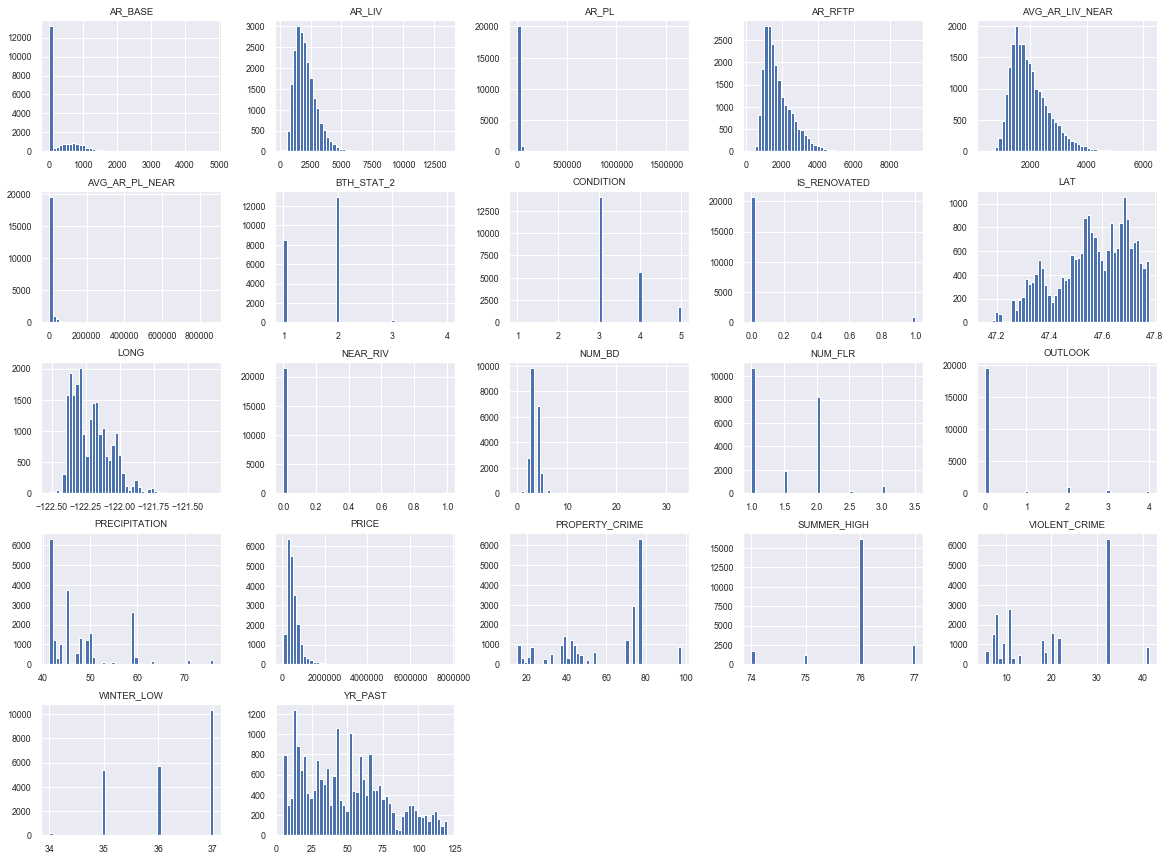

In [387]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Based on the above histogram, the facts and thoughts I found are as follows. 


- The range of values in most features is different. (The following ranges should be adjusted equally.)
- Given the tendency of the graph only, features that tend to be similar to that of a `PRICE` are `AR_LIV`, `AR_RFTP`, `AVG_AR_LIV_NEAR`(It should be determined whether they are meaningful).
- Also, based on the similar graph trends of `AR_LIV`, `AR_RFTP`and `AVG_AR_LIV_NEAR`, these variables seem correlated.
- Most houses don't `NEAR_RIV`. (If near_rib, will it have a big impact on `PRICE`?) 
- Most houses don't `IS_RENOVATED`. (If renovated, would it have a big impact on `PRICE`?)
- `Summer_high` and `Winter_low` are divided into four values, even though they are not categorical features. (I would like to check boxplot to see how each value relates to `PRICE`.)
- In addition, the correlation with `PRICE` and other variables should be examined through boxplot or scatterplot for other non-continuous values.

Based on what i found and thought above, i will proceed with EDA and data pre-processing.



- - -

## Exploratory Data Analysis (EDA)

First, I have to choose the most relevant features to solve the problem I define. I want to identify and hypothesize which of the upper characteristics are most relevant to the parameter `PRICE` that i want to predict.

### 1. The relationship between PRICE and AREA

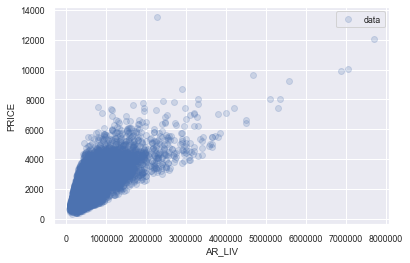

In [251]:
plt.scatter(df['PRICE'],df['AR_LIV'],label="data",alpha=.2)
plt.legend(loc="best")
plt.xlabel('AR_LIV')
plt.ylabel('PRICE')
plt.show()

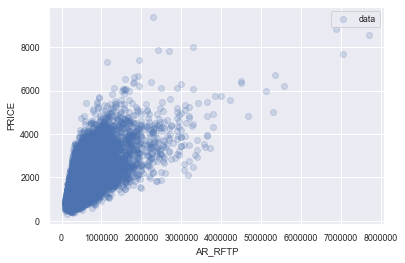

In [252]:
plt.scatter(df['PRICE'],df['AR_RFTP'],label="data",alpha=.2)
plt.legend(loc="best")
plt.xlabel('AR_RFTP')
plt.ylabel('PRICE')
plt.show()

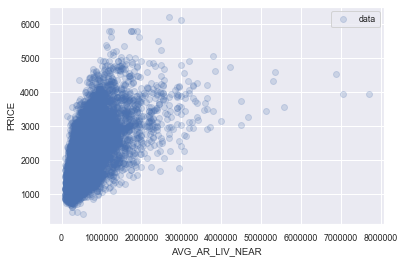

In [253]:
plt.scatter(df['PRICE'],df['AVG_AR_LIV_NEAR'],label="data",alpha=.2)
plt.legend(loc="best")
plt.xlabel('AVG_AR_LIV_NEAR')
plt.ylabel('PRICE')
plt.show()

There seems to be **some linear relationship** between the each variables and PRICE.

Let's look at the relationship with PRICE for additional area variables.

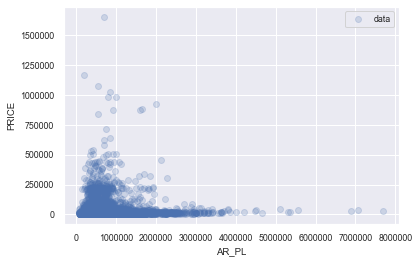

In [254]:
plt.scatter(df['PRICE'],df['AR_PL'],label="data",alpha=.2)
plt.legend(loc="best")
plt.xlabel('AR_PL')
plt.ylabel('PRICE')
plt.show()

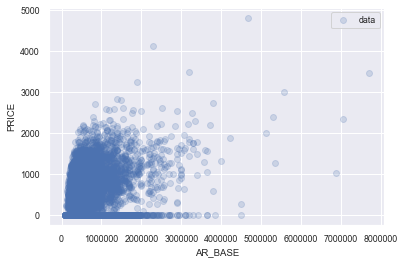

In [255]:
plt.scatter(df['PRICE'],df['AR_BASE'],label="data",alpha=.2)
plt.legend(loc="best")
plt.xlabel('AR_BASE')
plt.ylabel('PRICE')
plt.show()

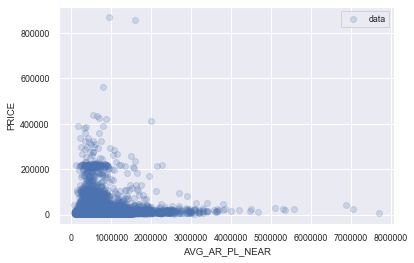

In [256]:
plt.scatter(df['PRICE'],df['AVG_AR_PL_NEAR'],label="data",alpha=.2)
plt.legend(loc="best")
plt.xlabel('AVG_AR_PL_NEAR')
plt.ylabel('PRICE')
plt.show()

Compared to the `AR_PL`, `AR_BASE`, and `AR_AR_PL_NEAR` variables discussed earlier, there seems to be **no linear relationship** with PRICE. Although `AR_BASE` shows a little linear relationship, certain values show an **outlier** that does not change the price even if the base area increases.


**Hypothesis 1**:The relationship between `PRICE` and area variables is likely to have a major impact on variables `AR_LIV`, `AR_RFTP` and `AVG_LIV_NEAR`.


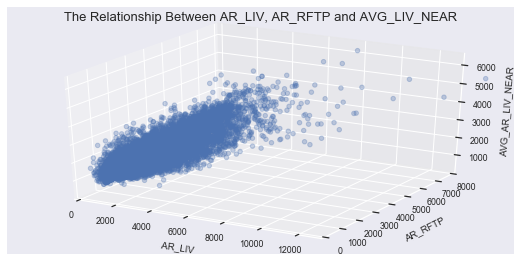

In [257]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,10))

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['AR_LIV'],df['AR_RFTP'],df['AVG_AR_LIV_NEAR'],alpha=.3)

ax.set_title("The Relationship Between AR_LIV, AR_RFTP and AVG_LIV_NEAR", fontsize=13)

ax.set(xlabel='\n AR_LIV',ylabel='\nAR_RFTP',zlabel='AVG_AR_LIV_NEAR')
ax.set(xlim=[0,13000])
ax.set(ylim=[0,8000])
plt.show()

But there seems to be a relationship between them, too. Later this relationship should be removed to proceed with modeling.

### 2. The relationship between PRICE and the number of room and floor(internal facilities)

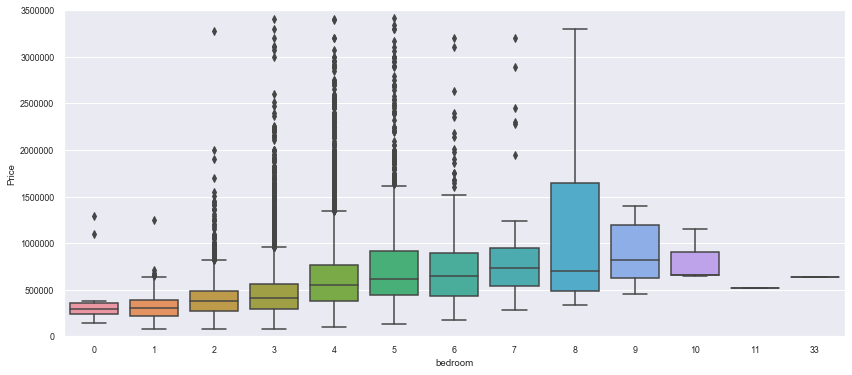

In [258]:
f, axe = plt.subplots(figsize=(14,6))
sns.boxplot(x=df['NUM_BD'],y=df['PRICE'], ax=axe)
axe.set(xlabel='bedroom', ylabel='Price')
axe.axis(ymin=0, ymax=3500000)
plt.show()

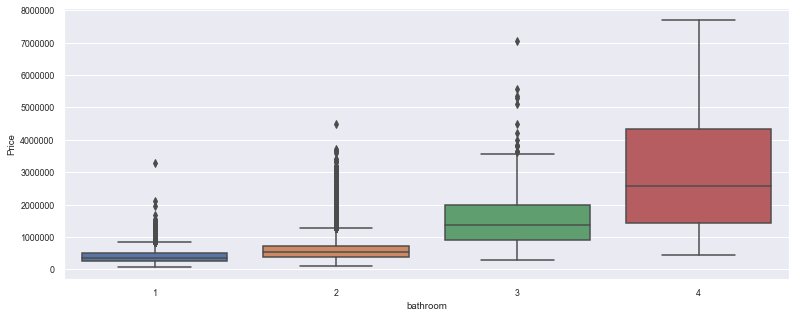

In [259]:
f, axe = plt.subplots(figsize=(13,5))
sns.boxplot(x=df['BTH_STAT_2'],y=df['PRICE'], ax=axe)
axe.set(xlabel='bathroom', ylabel='Price')
plt.show()

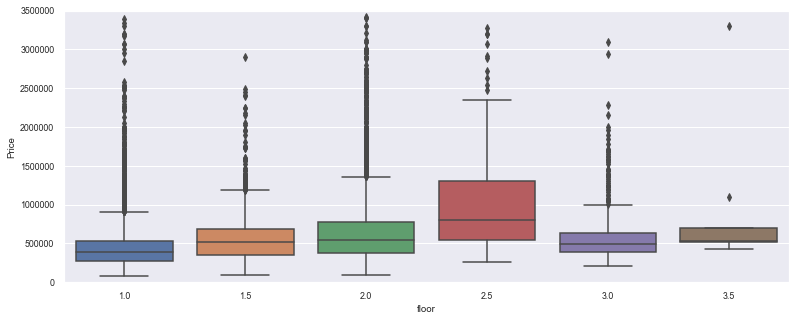

In [260]:
f, axe = plt.subplots(figsize=(13,5))
sns.boxplot(x=df['NUM_FLR'],y=df['PRICE'], ax=axe)
axe.set(xlabel='floor', ylabel='Price');
axe.axis(ymin=0, ymax=3500000);

The boxplot was drawn to find out the relationship between **PRICE**, the number of **bedrooms**, and the number of **bathrooms** (not the exact number, but the larger the number, the categorical variables), and the number of **floors**.


**Hypothesis 2** : Looking at each case, the **higher `NUM_BD` and `BTH_STAT_2`, the higher the tendency for `PRICE`**. However, it does not seem to have much to do with `NUM_FLR`.


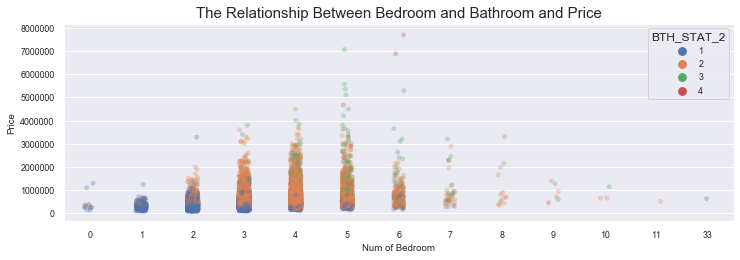

In [261]:
plt.figure(figsize = (12,8))

ax = plt.subplot(212)
ax = sns.stripplot(x="NUM_BD", y="PRICE",
                    data=df, alpha=0.3,
                    jitter=True, hue="BTH_STAT_2")
ax.set_title("The Relationship Between Bedroom and Bathroom and Price", fontsize=15)
ax.set_xlabel("Num of Bedroom")
ax.set_ylabel("Price")

plt.show()

The graph above shows that **the number of bathrooms increases as the number of bedrooms increases**. There also seems to be a relationship between `NUM_BD` and `BATH_STAT`. I should remove this relationship later.


### 3. The relationship between Price and Climate change

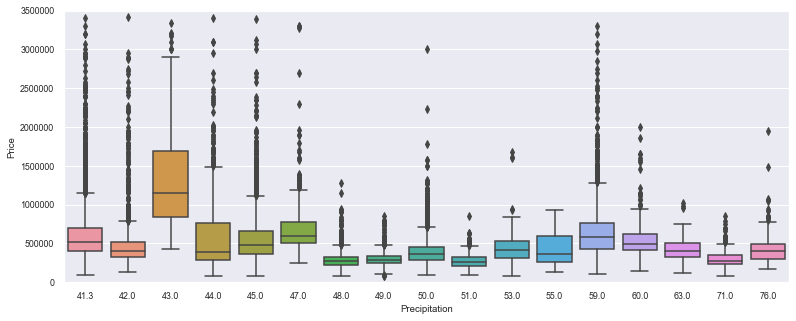

In [262]:
f, axe = plt.subplots(figsize=(13,5))
sns.boxplot(x=df['PRECIPITATION'],y=df['PRICE'], ax=axe)
axe.set(xlabel='Precipitation', ylabel='Price');
axe.axis(ymin=0, ymax=3500000);

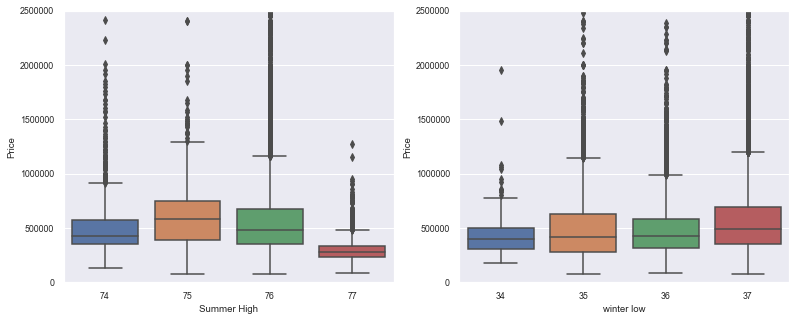

In [263]:
f, axe = plt.subplots(1, 2,figsize=(13,5))

sns.boxplot(x=df['SUMMER_HIGH'],y=df['PRICE'], ax=axe[0])
axe[0].set(xlabel='Summer High', ylabel='Price');
axe[0].axis(ymin=0, ymax=2500000);

sns.boxplot(x=df['WINTER_LOW'],y=df['PRICE'], ax=axe[1])
axe[1].set(xlabel='winter low', ylabel='Price');
axe[1].axis(ymin=0, ymax=2500000);

plt.show()

**Hypothesis 3**: `Price`, `PRECIPITATION`, `Summer_HIGH`, and `Winter_Low` are not related.

### 4. The relationship between Price and Near_RIV

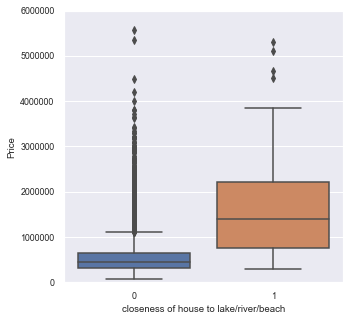

In [264]:
f, axe = plt.subplots(1, 1,figsize=(5,5))
sns.boxplot(x=df['NEAR_RIV'],y=df['PRICE'], ax=axe)
axe.set(xlabel='closeness of house to lake/river/beach', ylabel='Price')
axe.axis(ymin=0, ymax=6000000)
plt.show()

**Hypothesis 4**: If there is water near the house, the price is high. Therefore, **`NEAR_RIV` affects `PRICE`**.


### 5. The relationship between Price and Crime

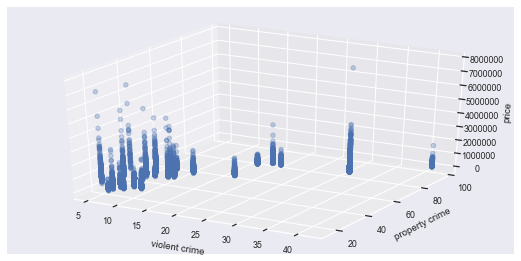

In [265]:
fig=plt.figure(figsize=(20,10))

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['VIOLENT_CRIME'],df['PROPERTY_CRIME'],df['PRICE'],alpha=.3)
ax.set(xlabel='\n violent crime',ylabel='property crime',zlabel='price')
plt.show()

**Hypothesis 5**: `Price`, `violent_crime`, and `Property_crime` are not related.

### 6. The relationship between Price and house position(latitude, longitude)

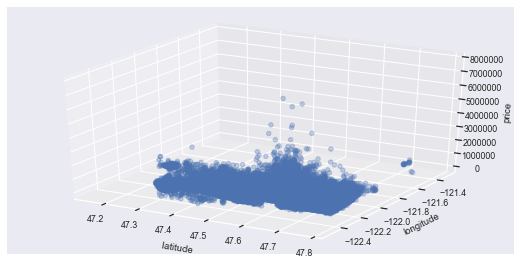

In [266]:
fig=plt.figure(figsize=(20,10))

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['LAT'],df['LONG'],df['PRICE'],alpha=.3)
ax.set(xlabel='\n latitude',ylabel='longitude',zlabel='price')
plt.show()

**Hypothesis 6**: `Price`, `Longitude`, and `Latitude` are not related.

### 7. The relationship between price and Appearance and Facilities

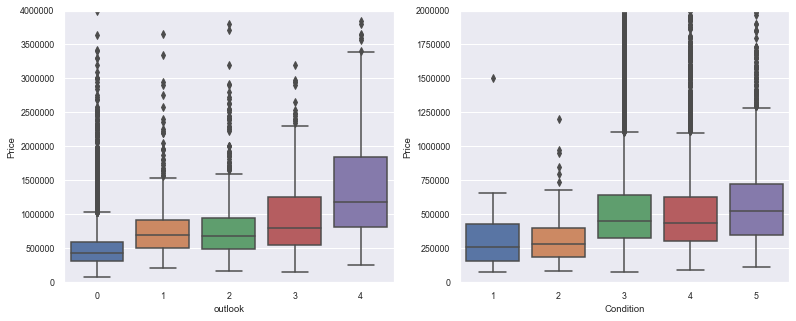

In [267]:
f, axe = plt.subplots(1, 2,figsize=(13,5))

sns.boxplot(x=df['OUTLOOK'],y=df['PRICE'], ax=axe[0])
axe[0].set(xlabel='outlook', ylabel='Price');
axe[0].axis(ymin=0, ymax=4000000);

sns.boxplot(x=df['CONDITION'],y=df['PRICE'], ax=axe[1])
axe[1].set(xlabel='Condition', ylabel='Price');
axe[1].axis(ymin=0, ymax=2000000);

plt.show()

In the graph above, the **higher the outlook, the higher the price tends to be generally higher**. On the other hand, **condition has some ambiguity**. Similar at levels 1 and 2 and similar at levels 3, 4, and 5.
I **drew another graph** thinking that the better the condition is, the better the outlook is.

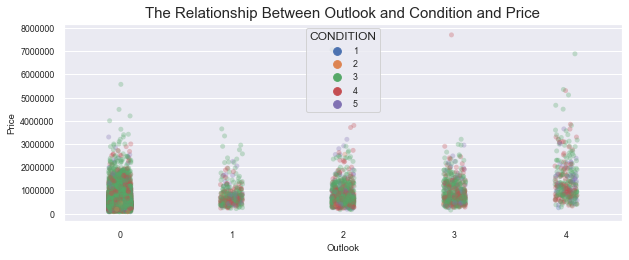

In [268]:
plt.figure(figsize = (10,8))

ax = plt.subplot(212)
ax = sns.stripplot(x="OUTLOOK", y="PRICE",
                    data=df, alpha=0.3,
                    jitter=True, hue="CONDITION")
ax.set_title("The Relationship Between Outlook and Condition and Price", fontsize=15)
ax.set_xlabel("Outlook")
ax.set_ylabel("Price")

plt.show()

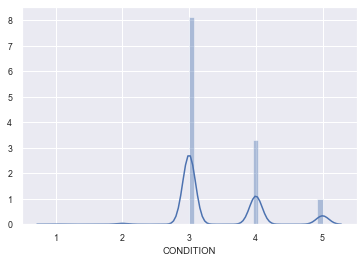

In [269]:
sns.distplot(df['CONDITION'])
plt.show()

Results show that the distribution of condition had too many values at 3 to determine the exact relationship between outlook and condition. Therefore, the distribution is too biased to identify a particular relationship, so `CONDITION` would be better not to consider it.

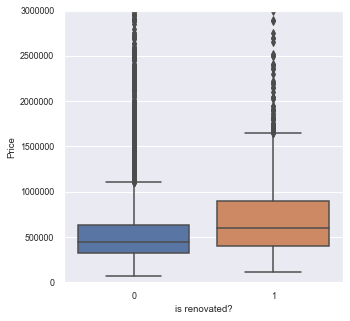

In [270]:
f, axe = plt.subplots(1, 1,figsize=(5,5))
sns.boxplot(x=df['IS_RENOVATED'],y=df['PRICE'], ax=axe)
axe.set(xlabel='is renovated?', ylabel='Price')
axe.axis(ymin=0, ymax=3000000)
plt.show()

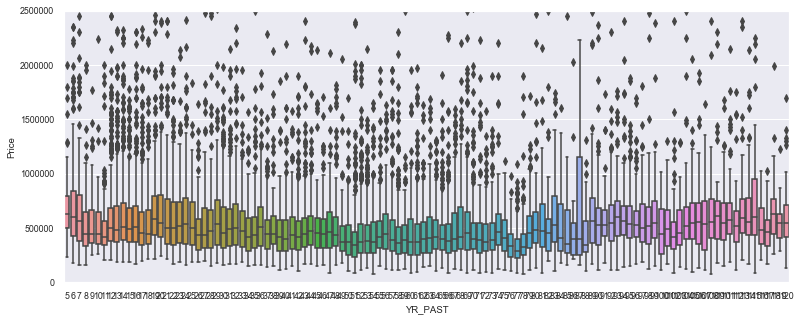

In [271]:
f, axe = plt.subplots(figsize=(13,5))
sns.boxplot(x=df['YR_PAST'],y=df['PRICE'], ax=axe)
axe.set(xlabel='YR_PAST', ylabel='Price')
axe.axis(ymin=0, ymax=2500000)
plt.show()

**Hypothesis 7**: As I said earlier, **the `outlook` and `price` seem to be related**, and the `condition` was so focused on a particular value that it was difficult to find the relationship. 

Also, the price change depending on 'is_renovated' is not significant at less than 500,000. **Therefore, `price` and `IS_RENOVATED` seem irrelevant.**

And there seems to be **no change in `PRICE` according to `YR_PAST`**.


#### **Conclusion of Hypothesis**

- **have relationship** with `PRICE` : `AR_LIV`, `AR_RFTP`,`AVG_AR_LIV_NEAR`,`NUM_BD`,`BTH_STAT_2`,`NEAR_RIV`,`OUTLOOK`

- don't have relationship with `PRICE` : `AR_PL`, `AR_BASE`, `AVG_AR_PL_NEAR`, `NUM_FLR`, `PRECEPITATION`, `SUMMER_HIGH`, `WINTER_LOW`,`VIOLENT_CRIME`,`PROPERTY_CRIME`, `LAT`, `LONG`, `CONDITION`, `IS_RENOVATED`, `YR_PAST`

### The Colerration Matrix

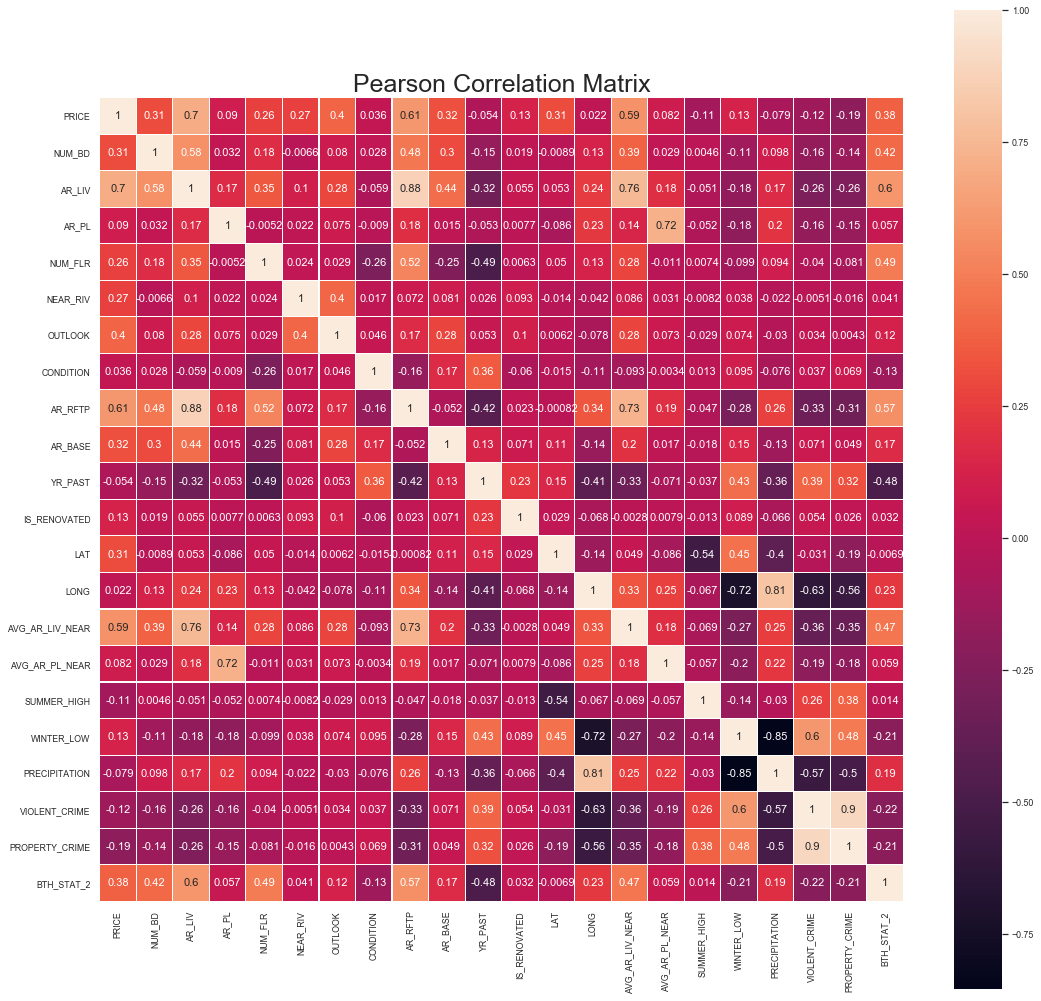

In [272]:
feature = ['PRICE', 'NUM_BD', 'AR_LIV', 'AR_PL', 'NUM_FLR', 'NEAR_RIV', 
           'OUTLOOK','CONDITION', 'AR_RFTP', 'AR_BASE', 'YR_PAST', 
           'IS_RENOVATED', 'LAT','LONG','AVG_AR_LIV_NEAR', 'AVG_AR_PL_NEAR', 'SUMMER_HIGH',
       'WINTER_LOW', 'PRECIPITATION', 'VIOLENT_CRIME', 'PROPERTY_CRIME',
       'BTH_STAT_2']
plt.subplots(figsize=(18, 18))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[feature].corr(),linewidths=0.1,vmax=1.0,square=True,
            annot=True,annot_kws={"size":11})
plt.show()

This is a Pearson Cerrelation Matrix with price for all variables.

See more detail!

In [388]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'PRICE').index

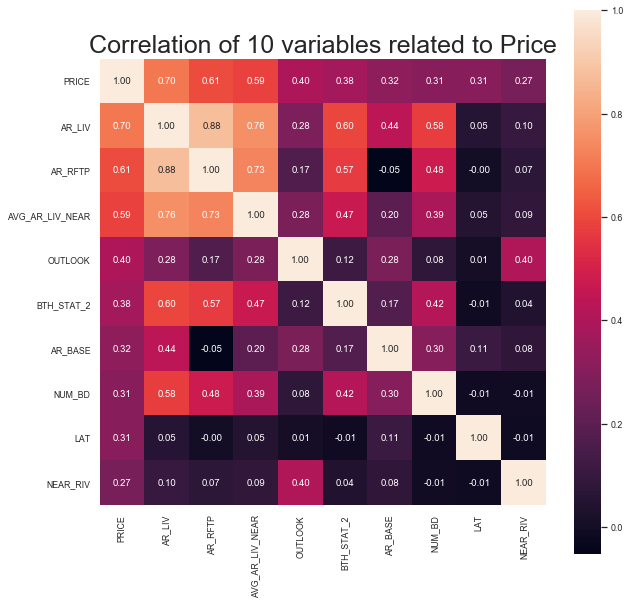

In [389]:
correlation_map = np.corrcoef(df[columns].values.T)
plt.subplots(figsize=(10, 10))
plt.title('Correlation of 10 variables related to Price',fontsize=25)

sns.set(font_scale=.8)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

The variables mentioned in my hypothesis are all included in the largest ten.

`AR_LIV`,`AR_RFTP`,`AVG_AR_LIV_NEAR`,`NUM_BD`,`BTH_STAT_2`,`NEAR_RIV`,`OUTLOOK`

**In other words, I can confirm that my hypothesis is somewhat correct for this matrix.** However, as we have seen in the preceding process, there are quite a few correlations for each variable, so we need to work through **Feature Engineering** to resolve them.

  - - -

## Modeling and Evaluating 

In [617]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [618]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [619]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=202040)

In [620]:
#Multiple Linear Regression

In [621]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)
mse_mlr = mean_squared_error(pred_mlr,y_test)
rmse_mlr = np.sqrt(mse_mlr)
cv_mlr = cross_val_score(mlr,X_train,y_train, cv=10).mean()

In [622]:
#Decision Tree

In [623]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)
mse_tr = mean_squared_error(pred_tr,y_test)
rmse_tr = np.sqrt(mse_tr)
cv_tr = cross_val_score(tr_regressor,X_train,y_train, cv=10).mean()

In [624]:
#Random Forest Regression Model

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)
mse_rf = mean_squared_error(rf_pred,y_test)
rmse_rf = np.sqrt(mse_rf)
cv_rf = cross_val_score(rf_regressor,X_train,y_train, cv=10).mean()

In [ ]:
#Calculate Score

In [ ]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))


In [ ]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf],
                            'RMSE':[rmse_mlr,rmse_tr,rmse_rf],
                            '10-CV':[cv_mlr,cv_tr,cv_rf]
                           })

In [ ]:
models_score.sort_values(by='10-CV',ascending=False)

## conclusion

Of the three models, RMSE values are the smallest, and 10-CV and Score think the largest random forest is the most suitable model.